<a href="https://colab.research.google.com/github/ssyss-513/MyColab/blob/main/2_Tutorial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DSAI5102 — Tutorial 3
  
**Topic**: Foundation of Statistics: distributions + Maximum Likelihood (ML) + Confidence Intervals (CI)


1.   We'll use the Scipy Statistics Module:

*   Compute mean, variance, and higher moments;
*   calculate the density, distribution function and quantile function for some continous or discrete distributions and generate random numbers from these distributions;

2.   列表项


### **Scipy Statistics Module**

**The** ***scipy.stats*** **module**: This is the core library for working with statistical distributions in Python, equivalent to R's basic stats functions.

There **are** over eighty continuous probability distributions implemented in *scipy.stats*
and an additional set of more than ten discrete distributions, along with many other
supplementary statistical functions.


In [ ]:
# load the module and create an object that has the distribution interested in, eg., normal distribution
import scipy.stats
n = scipy.stats.norm(0,10) # create normal distribution with mean 0 and standard deviation 10

The $n$ variable represents a normally distributed random variable with a mean of zero and a standard deviation of $\sigma$ = 10.
(Note that the more general term for these two parameters is location and scale, respectively.)

In [ ]:
# We can compute the mean and the variance, as in the following
print("mean: ", n.mean())
print("variance:", n.var())

mean:  0.0
variance: 100.0


In [ ]:
# We can also compute higher order (non-central) moments as
print("4-th moment: ", n.moment(4))

4-th moment:  30000.0


### **Question 1:**
For standard normal distribution (continuous):

a. Calculate the probability density function at $x=0$.



In [ ]:
sn = scipy.stats.norm(0,1)
# 1a. Calculate PDF at x=0
pdf_at_0 = sn.pdf(0)
print(f"PDF at x=0: {pdf_at_0:.4f}")

PDF at x=0: 0.3989


The PDF the for standard normal distribution at $x=0$ is 0.3989.

b. Calculate the cumulative distribution function at $x=0.5$ ($P(z \leq 0.5)$).

In [ ]:
# 1b. Calculate CDF at x=0.5
cdf_at_05 = sn.cdf(0.5)
print(f"CDF at x=0.5: {cdf_at_05:.4f}")

CDF at x=0.5: 0.6915


The CDF for the standard normal distribution at  $x=0.5$ is 0.6915 ($P(z \leq 0.5)=0.6915$).

c. Caculate the 0.95 quantile.

In [ ]:
# 1c. Calculate 0.95 quantile
quantile_095 = sn.ppf(0.95)
print(f"0.95 quantile: {quantile_095:.4f}")

0.95 quantile: 1.6449


The 0.95 quantile for the standard normal distribution is 1.6449 ($P(x \leq 1.6449)=0.95$).

d. Generate $n=100$ random samples from this distribution.

In [ ]:
import numpy as np
np.random.seed(123)
samples = sn.rvs(100)
print(f"First 10 samples: {samples[:10]}")
print(f"Sample mean: {np.mean(samples):.4f}")
print(f"Sample std: {np.std(samples):.4f}")

First 10 samples: [-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025  1.65143654
 -2.42667924 -0.42891263  1.26593626 -0.8667404 ]
Sample mean: 0.0271
Sample std: 1.1282


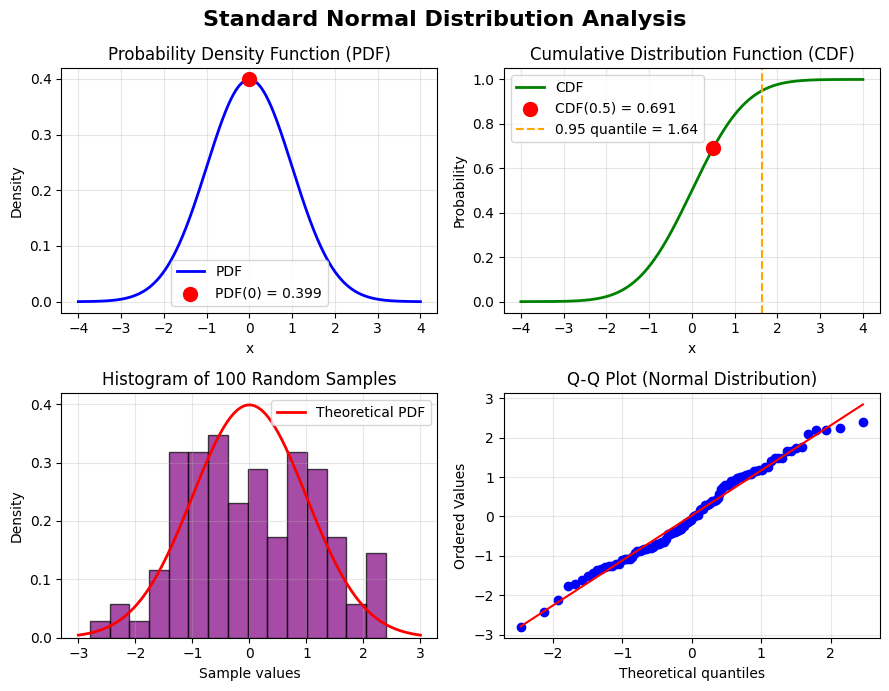

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('default')
sns.set_palette("deep")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(9, 7))
fig.suptitle('Standard Normal Distribution Analysis', fontsize=16, fontweight='bold')


# Plot 1: PDF with highlighted point
sn = scipy.stats.norm(0,1)
x = np.linspace(-4, 4, 1000)
y = sn.pdf(x)
axes[0,0].plot(x, y, 'b-', linewidth=2, label='PDF')
axes[0,0].scatter(0, pdf_at_0, color='red', s=100, zorder=5,
                 label=f'PDF(0) = {pdf_at_0:.3f}')
axes[0,0].set_title('Probability Density Function (PDF)')
axes[0,0].set_xlabel('x')
axes[0,0].set_ylabel('Density')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].legend()

# Plot 2: CDF with highlighted point
y_cdf = sn.cdf(x)
axes[0,1].plot(x, y_cdf, 'g-', linewidth=2, label='CDF')
axes[0,1].scatter(0.5, cdf_at_05, color='red', s=100, zorder=5,
                 label=f'CDF(0.5) = {cdf_at_05:.3f}')
axes[0,1].axvline(quantile_095, color='orange', linestyle='--',
                 label=f'0.95 quantile = {quantile_095:.2f}')
axes[0,1].set_title('Cumulative Distribution Function (CDF)')
axes[0,1].set_xlabel('x')
axes[0,1].set_ylabel('Probability')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].legend()

# Plot 3: Histogram of samples
axes[1,0].hist(samples, bins=15, density=True, alpha=0.7,
               color='purple', edgecolor='black')
x_fit = np.linspace(-3, 3, 100)
axes[1,0].plot(x_fit, stats.norm.pdf(x_fit), 'r-', linewidth=2,
              label='Theoretical PDF')
axes[1,0].set_title('Histogram of 100 Random Samples')
axes[1,0].set_xlabel('Sample values')
axes[1,0].set_ylabel('Density')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].legend()

# Plot 4: Q-Q plot
stats.probplot(samples, dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot (Normal Distribution)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Question 2:**
For binomial distribution $\text{Binomial}(n=10, p=0.3)$ (discrete):

a. Calculate the probability mass function at $k=3$ ($P(m=3)$).




In [ ]:
n = 10
p = 0.3
bd = scipy.stats.binom(n,p)
# 2a. Calculate PMF at k=3
pmf_at_3 = bd.pmf(3)
print(f"PMF at k=3: {pmf_at_3:.4f}")

PMF at k=3: 0.2668


The PMF the for $\text{Binomial}(n=10, p=0.3)$ at $k=3$ is 0.2668.

b. Calculate the cumulative distribution function at $k=5$ ($P(m\leq 5)$).

In [ ]:
# 2b. Calculate CDF at k=5
cdf_at_5 = bd.cdf(5)
print(f"CDF at k=5: {cdf_at_5:.4f}")

CDF at k=5: 0.9527


The CDF for the $\text{Binomial}(n=10, p=0.3)$ at  $k=5$ is 0.9527 ($P(m \leq 5)=0.9527$).

c. Calculate the 0.9 quantile.

In [ ]:
# 2c. Calculate 0.9 quantile
quantile_09 = bd.ppf(0.9)
print(f"0.9 quantile: {quantile_09:.4f}")

0.9 quantile: 5.0000


The 0.9 quantile for the $\text{Binomial}(n=10, p=0.3)$ is 5.

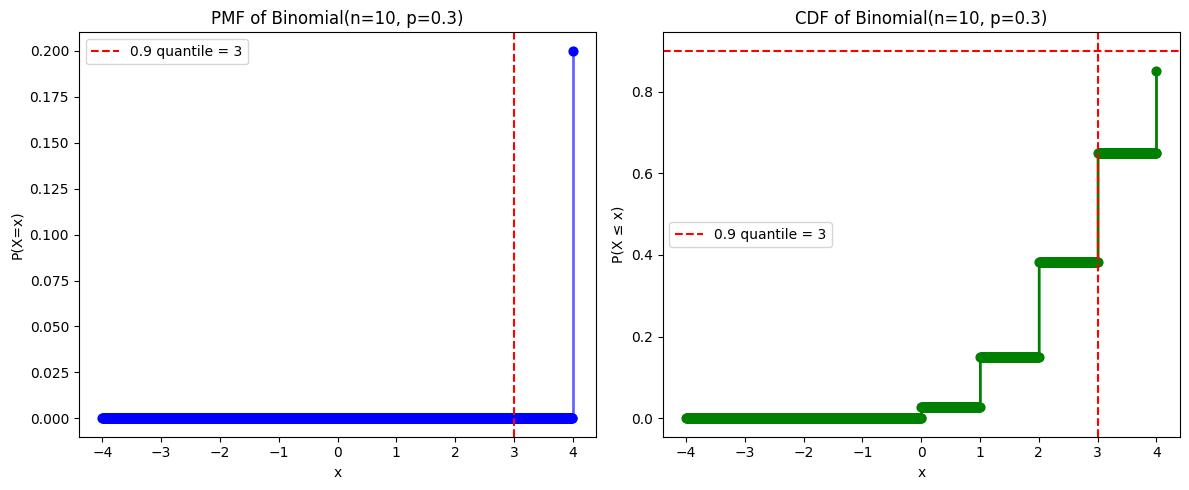

In [ ]:
# PMF 和 CDF
pmf = bd.pmf(x)
cdf = bd.cdf(x)

# 找到0.9分位数
q_90 = bd.ppf(0.5)

# 作图 - PMF
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.vlines(x, 0, pmf, colors='b', lw=2, alpha=0.6)
plt.scatter(x, pmf, color='b', s=40)
plt.title(f'PMF of Binomial(n={n}, p={p})')
plt.xlabel('x')
plt.ylabel('P(X=x)')
plt.axvline(q_90, color='red', linestyle='--', label=f'0.9 quantile = {int(q_90)}')
plt.legend()

# 作图 - CDF
plt.subplot(1, 2, 2)
plt.step(x, cdf, where='post', color='g', lw=2)
plt.scatter(x, cdf, color='g', s=40)
plt.title(f'CDF of Binomial(n={n}, p={p})')
plt.xlabel('x')
plt.ylabel('P(X ≤ x)')
plt.axhline(0.9, color='red', linestyle='--')
plt.axvline(q_90, color='red', linestyle='--', label=f'0.9 quantile = {int(q_90)}')
plt.legend()

plt.tight_layout()
plt.show()

d. Generate $m=100$ random samples from this distribution.

In [ ]:
import numpy as np
np.random.seed(1234)
samples = bd.rvs(100)
print(f"First 10 samples: {samples[:10]}")
print(f"Sample mean: {np.mean(samples):.4f}")
print(f"Sample std: {np.std(samples):.4f}")

First 10 samples: [2 3 3 4 4 2 2 4 6 5]
Sample mean: 3.0400
Sample std: 1.3851


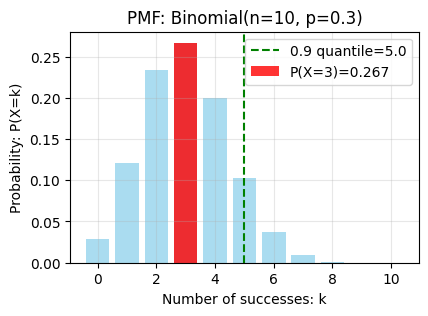

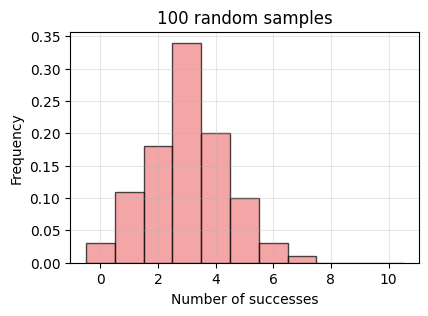

In [ ]:
# 可视化概率质量函数
k_values = np.arange(0, n+1)
probabilities = bd.pmf(k_values)

plt.figure(figsize=(4.5, 3))
plt.bar(k_values, probabilities, alpha=0.7, color='skyblue')
plt.title(f'PMF: Binomial(n={n}, p={p})')
plt.xlabel('Number of successes: k')
plt.ylabel('Probability: P(X=k)')
plt.grid(True, alpha=0.3)

# 标记特定值
plt.bar(3, bd.pmf(3), color='red', alpha=0.8, label=f'P(X=3)={pmf_at_3:.3f}')
plt.axvline(quantile_09, color='green', linestyle='--', label=f'0.9 quantile={quantile_09}')
plt.legend()
plt.show()

# 可视化随机样本的分布
plt.figure(figsize=(4.5,3))
plt.hist(samples, bins=np.arange(-0.5, n+1.5, 1),
         alpha=0.7, color='lightcoral', density=True, edgecolor='black')
plt.title('100 random samples')
plt.xlabel('Number of successes')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

**NOTE:** Of course, there are other ways to handle random variables. The following is an example of using *Sympy Statistics Module* to handle the standard normal distribution.

In [ ]:
from sympy import stats
X = stats.Normal("x",0,1) # create normal random variable
from sympy.abc import x
print("E(X) =", stats.E(X)) # calculate the exceptation
print("The probability density function is", stats.density(X)(x)) # obtain the probability density function
print("P(X ≤ 0) =", stats.cdf(X)(0)) # evaluate the cumulative density function
print("P(X > 0) =", stats.P(X>0)) # evaluate the probability P(X > 0)


E(X) = 0
The probability density function is sqrt(2)*exp(-x**2/2)/(2*sqrt(pi))
P(X ≤ 0) = 1/2
P(X > 0) = 1/2


### **Maximum Likelihood (ML)**

**Question 5: Setting Up the Coin Flipping Experiment**

Suppose we have coin and want to estimate the probability of heads ($p$) for it. We
model the distribution of heads and tails as a ***Bernoulli distribution*** with the following
probability mass function:
$$\phi(x)=p^x(1-p)^{(1-x)}$$
where $x$ is the outcome, 1 for heads and 0 for tails.

Note that maximum likelihood is
a parametric method that requires the specification of a particular model for which
we will compute embedded parameters. For $n$ independent flips, we have the *likelihood function* as the joint
density of the product of $n$ of these functions as in,
$$\mathcal L(p;\mathbf x)=\prod_{i=1}^n p^{x_i}(1-p)^{(1-x_i)}.$$

The principle of *maximum likelihood*  is to maximize the likelihood as the function of $p$ after plugging in all of the $x_i$ data.

**Simulating the Experiment.** We need the following code to simulate coin flipping.

In [ ]:
from scipy.stats import bernoulli
import numpy as np
np.random.seed(1234)

n = 100
p_true=1/2.0 # estimate this!
fp=bernoulli(p_true) # create bernoulli random variate
xs = fp.rvs(n) # generate some samples
print(xs[:30]) # see first 30 samples
k = np.sum(xs)  # Number of heads
print(f"Observed {k} heads out of {n} tosses")

[0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1]
Observed 57 heads out of 100 tosses


Now, we can write out the likelihood function using *Sympy*. Note that we give the
Sympy variables the `positive=True` attribute upon construction because this
eases Sympy's internal simplification algorithms.

In [ ]:
import sympy
x,p,z=sympy.symbols('x p z', positive=True)
phi=p**x*(1-p)**(1-x) # distribution function
L=np.prod([phi.subs(x,i) for i in xs]) # likelihood function
print(L) # approx 0.5?

### function
# Likelihood function 似然函数
def likelihood_bernoulli(p, data):
    """
    Calculate likelihood for Bernoulli distribution
    """
    return np.prod(bernoulli.pmf(data, p))

p**57*(1 - p)**43


Note that, once we plug in the data, the likelihood function is solely a function of
the unknown parameter ($p$ in this case). The following code uses calculus to find
the extrema of the likelihood function. Note that taking the *log* of $L$ makes the
maximization problem tractable but doesn't change the extrema.
$$\operatorname{log} \mathcal L(p;\mathbf x)=\sum_{i=1}^n x_i \operatorname{log}(p) + \sum_{i=1}^n (1-x_i) \operatorname{log}(1-p)$$

In [ ]:
logL=sympy.expand_log(sympy.log(L))

### function
# Log-likelihood function (better numerically)
def log_likelihood_bernoulli(p, data):
    """
    Calculate log-likelihood for Bernoulli distribution
    """
    return np.sum(bernoulli.logpmf(data, p))

# Let's test different values of p
p_values = np.linspace(0.01, 0.99, 100)
likelihoods = [likelihood_bernoulli(p, xs) for p in p_values]
log_likelihoods = [log_likelihood_bernoulli(p, xs) for p in p_values]


In [ ]:
sol,=sympy.solve(sympy.diff(logL,p),p)
print("MLE:", sol)

### function
# Find MLE analytically
mle_analytic = k / n
print(f"\nAnalytical MLE: p = {mle_analytic:.3f}")

# Find MLE numerically using optimization
import scipy.optimize as opt # Import the optimization module

def negative_log_likelihood(p, data):
    return -log_likelihood_bernoulli(p, data)

result = opt.minimize_scalar(negative_log_likelihood, bounds=(0.01, 0.99), args=(xs,)) # Use 'xs' instead of 'data'
mle_numeric = result.x
print(f"Numerical MLE: p = {mle_numeric:.3f}")

MLE: 57/100

Analytical MLE: p = 0.570
Numerical MLE: p = 0.570


The MLE of $p$ is 0.57, which is close to the true value of 0.5.

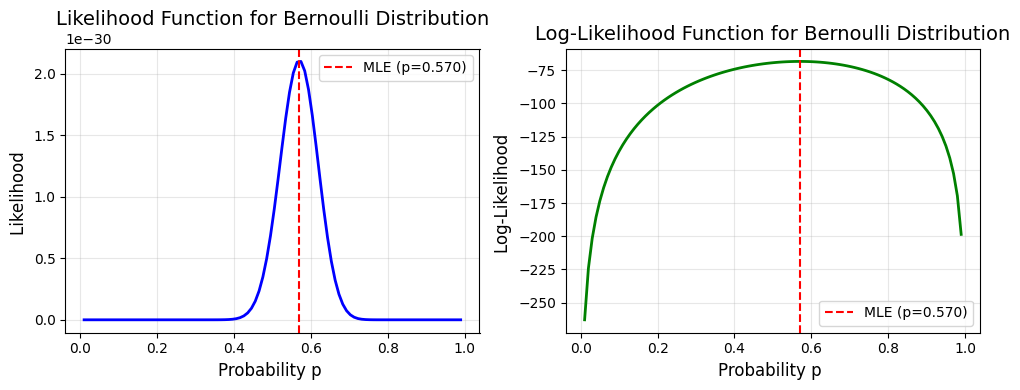

In [ ]:
# Plot likelihood and log-likelihood 绘制似然函数和对数似然函数
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

p_values = np.linspace(0.01, 0.99, 100)

# Likelihood plot 似然函数图
ax1.plot(p_values, likelihoods, 'b-', linewidth=2)
ax1.axvline(mle_analytic, color='r', linestyle='--', label=f'MLE (p={mle_analytic:.3f})')
ax1.set_xlabel('Probability p ', fontsize=12)
ax1.set_ylabel('Likelihood ', fontsize=12)
ax1.set_title('Likelihood Function for Bernoulli Distribution', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Log-likelihood plot 对数似然函数图
ax2.plot(p_values, log_likelihoods, 'g-', linewidth=2)
ax2.axvline(mle_analytic, color='r', linestyle='--', label=f'MLE (p={mle_analytic:.3f})')
ax2.set_xlabel('Probability p ', fontsize=12)
ax2.set_ylabel('Log-Likelihood ', fontsize=12)
ax2.set_title('Log-Likelihood Function for Bernoulli Distribution', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Probability Density for the Estimator.**

To write out the full density for $\hat p$, we first
have to ask what is the probability that the estimator will equal a specific value and
the tally up all the ways that could happen with their corresponding probabilities.
For example, what is the probability that
$$\hat p=\frac{1}{n}\sum_{i=1}^nx_i=0 ?$$
This can only happen one way: when $x_i = 0$, for all $i$. The probability of this happening
can be computed from the density
$$f(\mathbf x, p)=\prod_{i=1}^n\left(p^{x_i}(1-p)^{(1-x_i)}\right),$$
$$f\left(\sum_{i=1}^nx_i=0,p\right)=(1-p)^n.$$
Likewise, if $\{x_i\}$ has only one nonzero element, then
$$f\left(\sum_{i=1}^nx_i=1,p\right)=np(1-p)^{n-1},$$
where the $n$ comes from the $n$ ways to pick one element from the $n$ elements $x_i$.
Continuing this way, we can construct the entire density as
$$f\left(\sum_{i=1}^n x_i=k, p\right)=\binom{n}{k} p^k(1-p)^{n-k},$$
where the first term on the right is the binomial coefficient of $n$ things taken $k$ at a
time. This is the binomial distribution and it's not the density for $\hat p$, but rather for
$n \hat p$. We'll leave this as-is because it's easier to work with below. We just have to
remember to keep track of the $n$ factor.


**Confidence Intervals**

Now that we have the full density for $\hat{p}$, we are ready to ask some meaningful questions. For example, what is the probability the estimator is within $\epsilon$ fraction of the true value of $p$:

$$
\mathbb{P}(|\hat{p}-p| \leq \epsilon p)?
$$


More concretely, we want to know how often the estimated $\hat{p}$ is trapped within $\epsilon$ of the actual value. That is, suppose we ran the experiment $n$ times to generate $n$ different estimates of $\hat{p}$. What percentage of the $n$ so-computed values are trapped within $\epsilon$ of the underlying value. Rewriting the above equation as the following,

$$
\mathbb{P}(p-\epsilon p<\hat{p}<p+\epsilon p)=\mathbb{P}\left(n p-n \epsilon p<\sum_{i=1}^n x_i<n p+n \epsilon p\right).
$$

Consider: given I could only flip the coin 100 times, how close could I come to the true underlying value with high probability (say, 95%)? In this case, we are solving for $\epsilon$. Plugging in gives,
$$
\mathbb P \left(50 - 50\epsilon < \sum_{i=1}^{100}x_i < 50 + 50\epsilon	\right) = 0.95
$$
which we have to solve for $\epsilon$. Fortunately, all the tools we need to solve for this are
already in Scipy.

In [ ]:
from scipy.stats import binom
# n=100, p = 0.5, distribution of the estimator phat
b=binom(100,.5)
# symmetric sum the probability around the mean
g = lambda i:b.pmf(np.arange(-i,i)+50).sum()
print(g(10)) # approx 0.95
print(g(9))
print(g(11))

0.9539559330706568
0.9272429931224755
0.9719105320522213


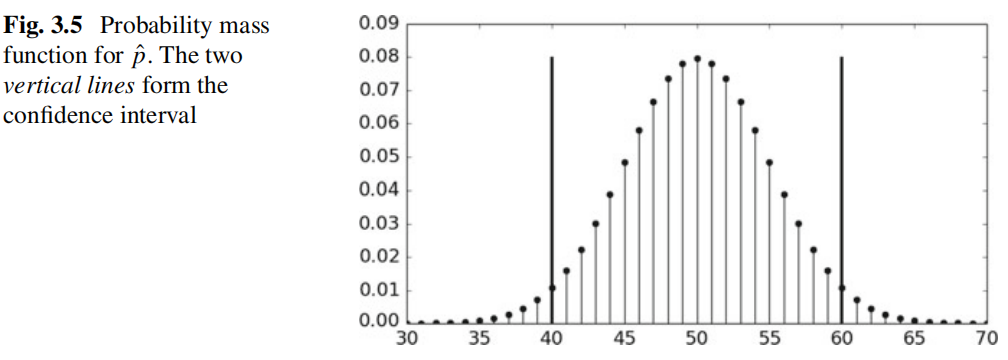

In [ ]:
from IPython.display import Image
display(Image('CI.png'))

The two vertical lines in the plot show how far out from the mean we have to go to
accumulate 95% of the probability. Now, we can solve this as
$$ 50 + 50\epsilon = 60% $$
which makes $\epsilon = 1/5$ or 20%. So, flipping 100 times means I can only get within
20% of the real $p$ 95% of the time in the worst case scenario (i.e., $p = 1/2$). The
following code verifies the situation.

In [ ]:
from scipy.stats import bernoulli
b=bernoulli(0.5) # coin distribution
xs = b.rvs(100) # flip it 100 times
phat = np.mean(xs) # estimated p
print (abs(phat-0.5) < 0.5*0.20)

True
